### Assignment 6

**Deadline: 4/22/2024 before midnight**

YOUR NAME:____

---
In this assignment, we analyze the diabetes dataset to predict the onset of diabetes based on diagnostic measures. We employ machine learning models, specifically K-nearest neighbors (KNN) and a dummy classifier, to evaluate their performance.

In [1]:
import pandas
diabetes = pandas.read_csv('../Datasets/diabetes.csv')
diabetes.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
289,5,108,72,43,75,36.1,0.263,33,0
116,5,124,74,0,0,34.0,0.220,38,1
740,11,120,80,37,150,42.3,0.785,48,1


---
**Problem 1**

Construct a KNN classifier with 7 nearest neighbors. to predict the Outcome of the dataset.

To predict the Outcome variable, use all of the othe variables as features.  

Features must be standardized before training the KNN model because distance-based algorithms are sensitive to the scale of the data.

Use the `train_test_split` method with a `random_state` of 1234, allocating 97% of the data for training and 3% for testing.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

y = diabetes['Outcome']
X = diabetes.drop(columns=['Outcome'])
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=1234, 
    test_size=0.03,
)

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

---
**Problem 2**

Extract and display the features and target variable from the test set before standardization to analyze their distributions and characteristics.


In [3]:
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=1234, 
    test_size=0.03)
X_test.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
718,1,108,60,46,178,35.5,0.415,24


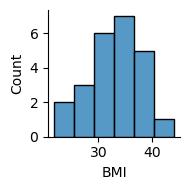

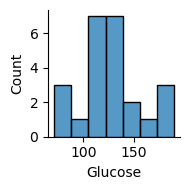

In [4]:
import seaborn
import warnings
warnings.filterwarnings('ignore')
seaborn.displot(data=X_test, x='BMI', height=2)
seaborn.displot(data=X_test, x='Glucose', height=2)

What can we say about this test data?  BMI looks like normally distributed.
This is not quite "normal".  Most of these patients in this test set are obese.

Glucose levels are also high.



In [5]:
y_test.value_counts()

0    14
1    10
Name: Outcome, dtype: int64

---
**Problem 3**

Utilize the KNN model to predict the test set outcomes and display these predictions.

In [6]:
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=1234, 
    test_size=0.03)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [8]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

---
**Problem 4**

What does this function do?  Explain using predictions of the test data obtained in Problem 1.

```python
def get_posneg_indices( predictions ):
    pidx = [ i for i in range(len(predictions)) if predictions[i]==1 ]
    nidx = [ i for i in range(len(predictions)) if predictions[i]==0 ]
    return pidx, nidx
```

`get_posneg_indices` returns two lists. The first is the indices of the positive predictions. The second is the indices of the negative predictions.

In [9]:
def get_posneg_indices( predictions ):
    pidx = [ i for i in range(len(predictions)) if predictions[i]==1 ]
    nidx = [ i for i in range(len(predictions)) if predictions[i]==0 ]
    return pidx, nidx

In [10]:
pos, neg = get_posneg_indices(predictions)
pos, neg

([1, 3, 10, 12, 16, 19, 20, 23],
 [0, 2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 17, 18, 21, 22])

In [11]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

---
**Problem 5**

Use `get_posneg_indices` to calculate the number of true positives, false postives, true negatives, and false negatives, when the KNN model in Problem 1 makes predictions with the testing data in Problem 1.

```
TP = 6
FP = 2
TN = 12
FN = 4
```

In [12]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

In [13]:
y_test.values

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1])

---
**Problem 6**

Calculate and report the accuracy, precision, and recall of the KNN model using the predictions and actual outcomes of the test data. These metrics are crucial for understanding the effectiveness of the model in predicting diabetes onset.

```
Accuracy = (6+12)/24 = 18/24
Precision = 6/(6 + 2) = 6/8
Recall = 6/(6 + 4) = 6/10

```

---
**Problem 7**

Cnstruct a dummy classifier using the `stratified` strategy.  How many positives and negatives, do you expect this model predicts?  How many positives and negatives, does it actually predict?

Similar to `DummyRegressor` we previously learned, `DummyClassifier` in scikit-learn is a simple algorithm used as a baseline for comparison with more sophisticated machine learning models. When the `strategy` parameter is set to `"stratified"`, the `DummyClassifier` predicts outputs based on the training set's class distribution. 

This means that it generates predictions by randomly choosing a class according to the observed frequency of each class in the training data. For example, if 20% of the training samples belong to Class A and 80% to Class B, the stratified `DummyClassifier` will predict Class A approximately 20% of the time and Class B approximately 80% of the time. This approach reflects the inherent class probabilities of the dataset, providing a baseline that indicates the performance of a purely random classification model respecting the original class distribution.

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html


In [14]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy='stratified')
baseline.fit(X_train, y_train)
predictions = baseline.predict(X_test)
pos, neg = get_posneg_indices(predictions)
pos, neg


([0, 7, 9, 10, 12, 13, 16, 22],
 [1, 2, 3, 4, 5, 6, 8, 11, 14, 15, 17, 18, 19, 20, 21, 23])

In [15]:
y_train.value_counts(1)

0    0.653226
1    0.346774
Name: Outcome, dtype: float64

In [16]:
(y_train.value_counts(1) * len(y_test)).round(0)

0    16.0
1     8.0
Name: Outcome, dtype: float64

We expect 16 negative predictions, and 8 positive predictions from stratified dummy classifier.

In actuality, this classifier made 9 positive predictions, and 15 negative predictions.

---
**Problem 8**

Calculate the number of true positives, false positives, true negatives, and false negatives for the dummy classifier, using the same test data as the KNN model.

```
TP = 6
FP = 2
TN = 12
FN = 4

```

In [17]:
print(predictions)
print(y_test.values)
len(predictions)

[1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0]
[0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1]


24

---
**Problem 9**

Compute the accuracy, precision, and recall for the dummy classifier to evaluate its performance relative to random guessing based on the class distribution in the training data.

```
Accuracy = 18/24
Precision = 6/8
Recall = 6/18

```

In [18]:
y_test.value_counts(1).round(2)*100

0    58.0
1    42.0
Name: Outcome, dtype: float64

In [19]:
18/24

0.75

Random guessing based on the distribution of y_test should be about 58% accurate.  This classifier is 0.75% accuracy.

---
**Problem 10**

Conduct a comparative analysis of the KNN classifier and the dummy classifier with a stratified strategy. Discuss the following aspects:

* Compare the accuracy of both classifiers to evaluate their overall effectiveness in predicting the correct outcomes.
* Assess how precisely the classifiers make positive predictions and their ability to capture actual positive instances respectively.


In [20]:
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
X = StandardScaler().fit_transform(X)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

model = KNeighborsClassifier()
baseline = DummyClassifier(strategy='stratified')



In [22]:
from sklearn.model_selection import cross_validate, ShuffleSplit
cv = ShuffleSplit(n_splits=100)
result = cross_validate(model, X, y, cv=cv, scoring=['accuracy','precision','recall'])
print(result['test_accuracy'].mean().round(2))
print(result['test_precision'].mean().round(2))
print(result['test_recall'].mean().round(2))

0.74
0.66
0.54


In [23]:
result = cross_validate(baseline, X, y, cv=cv, scoring=['accuracy','recall','precision'])
print(result['test_accuracy'].mean().round(2))
print(result['test_precision'].mean().round(2))
print(result['test_recall'].mean().round(2))

0.55
0.36
0.35


In [25]:
result.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision'])

KNN is more accurate (0.73 vs 0.54) and more precise (0.64 vs 0.34).